#SECTION 1 (KEY TERMS)

#Dictionary 📖

**Normal Dictionary:**

``` movie = {"name": "Avengers ENdgame", "year": 2019}```

- Allows for efficient data retrieval based on unique keys
- Flexible and easy to implement
- Leads to challenges in ensuring that the data is a particular structure especially for larger projects
- Doesn't check if data is the correct type or structure

#Type Dictionary 📚
```
from typing import TypeDict
class Movie(TypeDict):
  name : str
  year : int

movie = Movie(name="Avengers Endgame", year=2019)
```

- **Type Safety** - we defined explicitly what the data structures are, reducing runtime errors
- **Enhanced Redability** - Makes debugging easier and makes code more understandable.

#Union 🤝
```
from typing import Union

def square(x: Union[int, float]) -> float:
  return x * x

x = 5  # ✅ this is fine
x = 1.234 # ✅ this is also fine
x = "I am a string # ❌ this will fail
```
- Union lets you say that a value can be more than one type
- Flexible and easy to code
- Type Safety as it can provide hints to help catch incorrect usage

#Optional 🤔

```
from typing import Optional

def nice_message(name: Optional[str])->None:
  if name us None:
    print("Hey random person!")
  else:
    print(f"His there, {name}!")
```

- In this case "name" can be either String or None!
- It cannot be anything else

#Any 🎲

```
from typing imprt Any
def print_value(x: Any):
  print(x)

print_value("I pretend to be Rust in the shower sometimes")
```
Anything and everything is allowed

#Lambda Function ⏳
```
square = lambda x: x*x
square(10)

```
```
nums = [1,2,3,4]
squares = list(map(lambda x:x*x, nums))
```


#Elements


##State 🧮

- The state is a shared data structure that holds the current information or context of the entire application.
- In simple terms, it is like the application's memory, keeping track of the variables and data that nodes can access and modify as they execute.

**Ananlogy:**
- Whiteboard in a Meeting Room: Praticipants (nodes) write and read information on the whiteboard (state) to stay updated and coordinate actions.

#Nodes 📌
- Nodes are individual functions or operations that perform tasks within the graph.
- Each node receives input (often the current state), processes it, and produces an output or an updated state.

**Analogy:**
- **Assembly Line Stations:** Each station does one job- attach a part, paint it, inspect quality and so on

#Graph 📊
- A graph in LangGraph is the overarching structure that maps out how different tasks (nodes) are connected and executed.
- It visually represents the workflow, showing the sequence and conditional paths between various operations.

#Edges 🔥
- Edges are the connections between nodes that determone the flow of execution.
- They tell us which node should be executed next after current one completes it's task.

#Conditional Edges 🎣
- These are specialised connections that decide the next node to execute based on specific conditions or logic applied to the current state.

#Start 🚀
- The start node is a virtual entry point in LagGraph, marking where the workflow begins.
- It doesn't perform any operations itself but serves as the designated starting position for the graph's execution.

#End 🚩
- The END node signifies the conclusion of the worflow in lagGraph.
- Upon reaching this node, the graph's execution stops, Indicating that all intended processes have to be completed

#Tools 🛠
- Tools are specialized functions or utilities that nodes can utilize to perform specific tasks as fetching from an API.
- They enhance the capabilities of nodes by providing additional functionalities.
- Nodes are part of the graph structure, while tools are functionalities used within a node.

#ToolNode 🔍
- ToolNode is just a special kind of node whose main job is to run a tool.
- It connects the tool's putput back into the State, so other nodes can use that information.

#StateGraph 🏠
- StateGraph is a class in LangGraph used to build and compile the graph structure.
- It manages the nodes, edges, and the overall state, ensuring that the workflow operates in a unified way and that data flows correctly beteween components

#Runnable ⚡
- A Runnable in a LangGraph is a standardized, executable component that performs a specified task within an AI workflow.
- it serves as a fundamental building block, allowing for us to create modular systems.


#Messages 📬

👨‍💼**Human Message**: Represents input from a user.

💻**System Message**: Used to provide instructions or context to the model.

🧩**Function Message**: Represents the result of a function call.

🤖**AI Message**: Represents responses generated by AI models.

🔧**Tool Message**: Similar to Function Message, but specific to tool usage.

#SECTION 2 (GRAPH BUILDING)

In [1]:
!pip install langgraph langgraph-prebuilt langgraph-sdk langsmith langchain-community langchain-core langchain-openai notebook tavily-python


  Using cached langchain_core-0.3.61-py3-none-any.whl.metadata (5.8 kB)
  Using cached langchain-0.3.25-py3-none-any.whl.metadata (7.8 kB)
Using cached langchain_core-0.3.61-py3-none-any.whl (438 kB)
Using cached langchain-0.3.25-py3-none-any.whl (1.0 MB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.35
    Uninstalling langchain-core-0.2.35:
      Successfully uninstalled langchain-core-0.2.35
  Attempting uninstall: langchain
    Found existing installation: langchain 0.2.14
    Uninstalling langchain-0.2.14:
      Successfully uninstalled langchain-0.2.14


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 1.0.10 requires langchain-core<0.3,>=0.2.33, but you have langchain-core 0.3.61 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
# Now create an AgentState - Shared data structure that keeps track of information as our application runs.
class AgentState(TypedDict):
  message: str

def greeting_node(state: AgentState)->AgentState: #input and output both are states
                                                  #and both are AgentStates that we defined earlier
    '''
    Simple node that adds a greeting message to the state
    '''
    state['message'] = "Hey " + state['message'] + ", how is your day going?"
    return state


In [5]:
graph = StateGraph(AgentState)
graph.add_node("greet_node", greeting_node) #name of the node and action

#we gotta add start and the end

graph.set_entry_point("greet_node")
graph.set_finish_point("greet_node")

app = graph.compile()

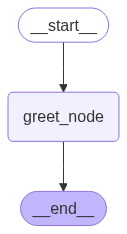

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({"message": "Pratham"})
result["message"]

'Hey Pratham, how is your day going?'

In [8]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [9]:
class AgentState_2(TypedDict):
  compliment: str

def compliment_agent(state: AgentState_2)-> AgentState_2:
  state['compliment'] = state['compliment'] + " you're doing an amazing job learning LangGraph!"

  return state

In [ ]:
node = StateGraph(AgentState_2)
node.add_node("compliment_node",compliment_agent)
node.set_entry_point("compliment_node")
node.set_finish_point("compliment_node")
app_2 = node.compile()


In [ ]:
result = app_2.invoke({"compliment":"Pratham"})
result["compliment"]

"Pratham you're doing an amazing job learning LangGraph!"

#SECTION 3 (GRAPH II)

In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [ ]:
class AgentState_3(TypedDict):
  values: List[int]
  name: str
  result: str

In [ ]:
def process_values(state:AgentState_3)->AgentState_3:
  """
  This functions handles multiple different inputs
  """
  print(state)
  state["result"] = f"Hi {state['name']}!, your total marks = {sum(state['values'])}"
  print(state)
  return state


In [ ]:
node = StateGraph(AgentState_3)
node.add_node("processor", process_values)
node.set_entry_point("processor")
node.set_finish_point("processor")
app_3 = node.compile()

In [ ]:
result = app_3.invoke({"values":[1,2,3,4,5], "name":"Pratham"})
result['result']

{'values': [1, 2, 3, 4, 5], 'name': 'Pratham'}
{'values': [1, 2, 3, 4, 5], 'name': 'Pratham', 'result': 'Hi Pratham!, your total marks = 15'}


'Hi Pratham!, your total marks = 15'

##Excercise 📐

In [ ]:
class AgentState(TypedDict):
  name: str
  values:List[int]
  operation: str
  result: str

In [ ]:
def jack_sparrow(state: AgentState)->AgentState:
  total = 0
  if state['operation'] == '+':
    total = sum(state['values'])
  elif state['operation'] == '*':
    squared_sum=1;
    for i in state['values']:
      squared_sum *= i
    total = squared_sum
  # else:
  #   print(f"⚠️ Unsupported operation '{state['operation']}' received. Defaulting to 0.")

  state['result'] = f"Hi {state['name']}, your total marks = {total}"
  return state

In [ ]:
node = StateGraph(AgentState)
node.add_node("processor", jack_sparrow)
node.set_entry_point("processor")
node.set_finish_point("processor")
app_4 = node.compile()


In [ ]:
result = app_4.invoke({"name":"Pratham", "values":[1,2,3,4,5], "operation":"*"})
print(result)

{'name': 'Pratham', 'values': [1, 2, 3, 4, 5], 'operation': '*', 'result': 'Hi Pratham, your total marks = 120'}


#Section 4 (CONDITIONAL GRAPH)

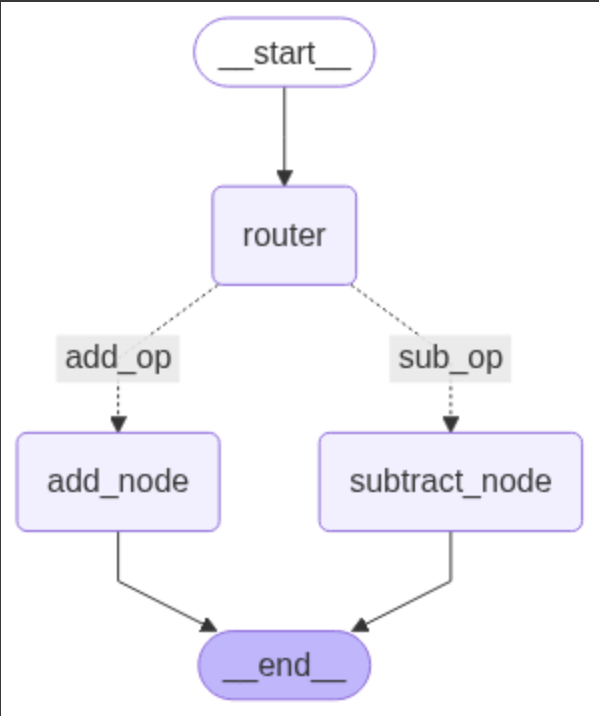

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
  num_1: int
  num_2: int
  operation: str
  final: int

In [ ]:
def adder(state:AgentState)->AgentState:
  """This node adds 2 numbers"""
  state["final"] = state["num_1"] + state["num_2"]
  return state

def subtractor(state:AgentState)->AgentState:
  """This node subtracts 2 numbers"""
  state["final"] = state["num_1"] - state["num_2"] if state["num_1"] > state["num_2"] else state["num_2"] - state["num_1"]
  return state

def decide_next_node(state:AgentState)-> AgentState:
  """This node will select the next node of the graph"""
  if state['operation'] == "+":
    return "add_op"
  elif state['operation'] == "-":
    return "sub_op"



In [ ]:
graph = StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state) #we are not returning state in 'decide_next_node' function,
                                            #So we say input state= output state using lambda function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", #source
    decide_next_node, #path
    {
        #edge: Node
        "add_op": "add_node",
        "sub_op": "subtract_node"
    } #path map
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app = graph.compile()


In [ ]:
initial_state = AgentState(num_1 = 10, num_2 = 5, operation = "+")
app.invoke(initial_state)

{'num_1': 10, 'num_2': 5, 'operation': '+', 'final': 15}

The error was a `KeyError` because the string returned by the routing logic (`"addition_operation"`) didn't match any key in the conditional edge map (`"add_op"`). We fixed this by making the routing function return the correct keys (`"add_op"` or `"sub_op"`) that exist in the dictionary used by `add_conditional_edges`.

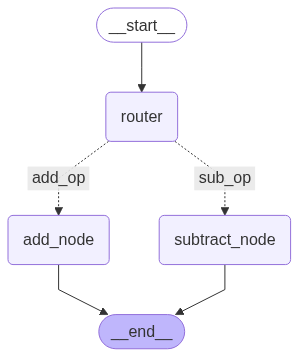

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

##Excercise 📐

In [ ]:
class AgenticState(TypedDict):
  num_1: int
  num_2: int
  num_3: int
  num_4: int
  operation_1: str
  operation_2: str
  final_1: int
  final_2: int


In [ ]:
def adder(state:AgenticState)->AgenticState:
  """This function adds 2 numbers"""
  state['final_1'] = state['num_1'] + state['num_2']
  return state

def subtractor(state:AgenticState)->AgenticState:
  """This function subtracts 2 numbers"""
  state['final_1'] = state['num_1'] - state['num_2'] if state['num_1']>state['num_2'] else state['num_2'] - state['num_1']
  return state

def decide_next_node(state:AgenticState)->AgenticState:
  if state['operation_1'] == "+":
    return "add_op"
  elif state['operation_1'] == '-':
    return 'sub_op'

def adder2(state:AgenticState)->AgenticState:
  """This function adds 2 numbers"""
  state['final_2'] = state['num_3'] + state['num_4']
  return state

def subtractor2(state:AgenticState)->AgenticState:
  """This function subtracts 2 numbers"""
  state['final_2'] = state['num_3'] - state['num_4'] if state['num_3']>state['num_4'] else state['num_4'] - state['num_3']
  return state

def decide_next_node2(state:AgenticState)->AgenticState:
  if state['operation_2'] == "+":
    return "add_op_2"
  elif state['operation_2'] == '-':
    return 'sub_op_2'

In [ ]:
graph = StateGraph(AgenticState)
graph.add_node("add_node",adder)
graph.add_node("sub_node",subtractor)
graph.add_node("router",lambda state:state)

graph.add_node("add_node_2",adder2)
graph.add_node("sub_node_2",subtractor2)
graph.add_node("router_2",lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "add_op": "add_node",
        "sub_op": "sub_node"
    }
)
graph.add_edge("add_node", "router_2")
graph.add_edge("sub_node", "router_2")
graph.add_conditional_edges(
    "router_2",
    decide_next_node2,
    {
        "add_op_2": "add_node_2",
        "sub_op_2": "sub_node_2"
    }
)


graph.add_edge("add_node_2",END)
graph.add_edge("sub_node_2",END)

app = graph.compile()

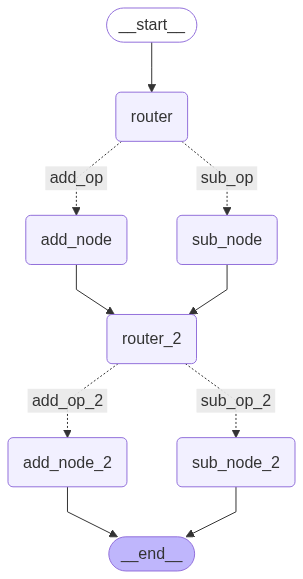

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state = AgenticState(num_1=23,num_2=25,num_3=6,num_4=211,operation_1="+",operation_2="-")
print(app.invoke(initial_state))

{'num_1': 23, 'num_2': 25, 'num_3': 6, 'num_4': 211, 'operation_1': '+', 'operation_2': '-', 'final_1': 48, 'final_2': 205}


#Section 5 (Looping Graph)

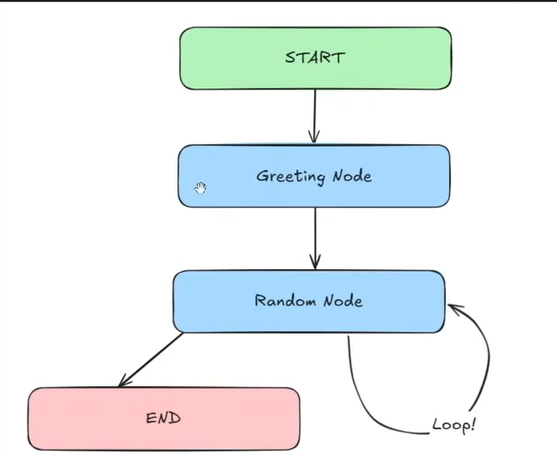

In [ ]:
from langgraph.graph import StateGraph, END, START
import random
from typing import TypedDict, List, Dict

In [ ]:
class AgentState(TypedDict):
  name: str
  number: List[int]
  counter: int

In [ ]:
def greeting_node(state:AgentState)->AgentState:
  """Greeting node says hi to the person"""
  state['name'] = f"Hi there!!, {state['name']}"
  state["counter"] = 0 #reset the user input of counter to 0 always to make sure loop runs 5 times only

def random_node(state:AgentState)->AgentState:
  """Generates a random number from 0 to 10"""
  state["number"].append(random.randint(0,10))
  state["counter"] += 1
  return state

def loop_function(state:AgentState)->AgentState:
  """Function to check whether to loop or not"""
  if state["counter"]<5:
    print("ENTERING LOOP", state["counter"])
    return "loop"
  else:
    return "exit"


In [ ]:
graph = StateGraph(AgentState)
graph.add_node("hello", greeting_node)
graph.add_node("random",random_node)

graph.add_edge(START,"hello")
graph.add_edge("hello","random")

graph.add_conditional_edges(
    "random",
    loop_function,
    {
        "loop": "random",
        "exit": END
    }
)
graph.add_edge("random",END)

app = graph.compile()


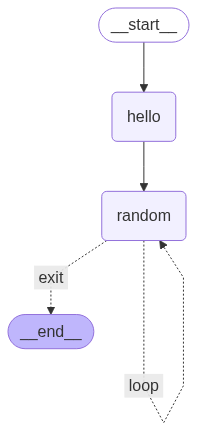

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state = AgentState(name="Pratham",number = [1,2,34],counter=-1)
app.invoke(initial_state)

ENTERING LOOP 0
ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Pratham', 'number': [1, 2, 34, 4, 4, 0, 2, 2, 2], 'counter': 5}

In [ ]:
class AgentState(TypedDict):
  name: str
  result:str
  guesses: List[int]
  attempts: int
  lower_bound: int
  upper_bound: int
  secret_number: int


In [ ]:
def setup_node(state:AgentState)->AgentState:
  state['name'] = "Hi" + state["name"] + "😎"
  state['result'] = "lean_back and wait for it"
  print(state)
  return state

def guess_node(state:AgentState)->AgentState:
  guess = random.randint(state['lower_bound'], state['upper_bound'])
  state['guesses'].append(guess)
  state['attempts'] += 1
  if guess == state['secret_number']:
    state['result'] = f"{state['name']}, The guess was {state['guesses'][-1]}, made at attempt: {state['attempts']}"
  return state

def hint_node(state:AgentState)->AgentState:
  guessed = state['guesses'][-1]
  if state['attempts'] <= 7:
    if guessed == state['secret_number']:
      return 'end'
    elif guessed < state['secret_number']:
      state['lower_bound'] = guessed
      return 'continue'
    else:
      state['upper_bound'] = guessed
      return 'continue'
  else:
    state['result'] = f"{state['name']}, ooopsyy, we ran out of attempts, {state['guesses']}"
    return 'end'




In [ ]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", lambda state:state)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges(
    "hint",
    hint_node,
    {
        "continue": "guess",
        "end": END
    }
)

graph.add_edge("hint", END)

app = graph.compile()

In [ ]:
initial_state = AgentState(name="Pratham", guesses=[], attempts=0, lower_bound=0, upper_bound=20, secret_number=10)
app.invoke(initial_state)

{'name': 'HiPratham😎', 'guesses': [], 'attempts': 0, 'lower_bound': 0, 'upper_bound': 20, 'secret_number': 10, 'result': 'lean_back and wait for it'}


{'name': 'HiPratham😎',
 'result': 'lean_back and wait for it',
 'guesses': [5, 20, 8, 15, 0, 19, 9, 6],
 'attempts': 8,
 'lower_bound': 0,
 'upper_bound': 20,
 'secret_number': 10}

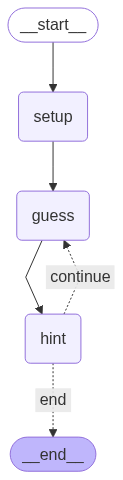

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
